In [210]:
import sklearn
from sklearn import datasets
from sklearn import svm       # import support vector machine
from sklearn.svm import SVC   # import classfier of svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [109]:
#dir(datasets)

In [110]:
iris = datasets.load_iris()

In [111]:
type(iris)

sklearn.utils._bunch.Bunch

In [112]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [113]:
type(iris.data)

numpy.ndarray

In [114]:
iris.data.shape

(150, 4)

In [115]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [116]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [117]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [118]:
iris.target.shape

(150,)

In [119]:
df = pd.read_csv('Seed_Data.csv')

In [120]:
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [121]:
df.shape

(210, 8)

In [122]:
df.columns

Index(['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG', 'target'], dtype='object')

In [123]:
X = df.iloc[:, 0:7]

In [124]:
X.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [125]:
y = df.iloc[:,7]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [126]:
type(y)

pandas.core.series.Series

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [128]:
sc = StandardScaler()

In [129]:
X_train = sc.fit_transform(X_train)

In [130]:
X_test = sc.transform(X_test)

In [131]:
X_train

array([[ 1.48368442,  1.60267517, -0.11991681, ...,  0.81343913,
        -0.9937377 ,  2.19083249],
       [ 0.34613237,  0.29257419,  0.89555987, ...,  0.48882981,
         1.24345987, -0.52885215],
       [ 1.42325197,  1.38169428,  0.82241113, ...,  1.20131976,
        -0.28476207,  1.3648083 ],
       ...,
       [ 0.71583679,  0.76610466,  0.30606705, ...,  0.63187798,
         0.21275331,  0.92701548],
       [-1.26065989, -1.20693899, -1.54846876, ..., -1.50284095,
         1.0761079 , -0.61971481],
       [ 1.91737613,  1.85522476,  0.77077672, ...,  1.67172818,
         0.97102642,  1.6415264 ]])

In [132]:
clf = SVC()

In [133]:
clf.fit(X_train, y_train)

SVC()

In [134]:
pred_clf = clf.predict(X_test)

In [135]:
accuracy_score(y_test, pred_clf)

0.9523809523809523

In [136]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.95      0.97        19
           2       1.00      0.93      0.97        15

    accuracy                           0.95        42
   macro avg       0.93      0.96      0.94        42
weighted avg       0.96      0.95      0.95        42



### For iris dataset; logistic regression

In [143]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [138]:
pipe_lr = Pipeline([
    ('minmax', MinMaxScaler()),
    ('lr', LogisticRegression())
])

In [139]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('minmax', MinMaxScaler()), ('lr', LogisticRegression())])

In [140]:
score = pipe_lr.score(X_test, y_test)
print(score)

0.9666666666666667


# Random Forest classifier

In [196]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=30)

In [197]:
clf = RandomForestClassifier()

In [198]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [199]:
pred_clf = clf.predict(X_test)

In [200]:
accuracy_score(y_test, pred_clf)

0.9333333333333333

In [201]:
# Combinations of these parameters we want to
# test our models with
param_grid = {
    'n_estimators':[2,5,10,20],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2,3]
}

In [202]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid
)

In [203]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [2, 5, 10, 20]})

In [204]:
grid_search.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 2}

In [205]:
clf_best_param = RandomForestClassifier(n_estimators=2, min_samples_split=3, min_samples_leaf=3)

In [206]:
clf_best_param.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=3, n_estimators=2)

In [207]:
y_pred = clf_best_param.predict(X_test)

In [208]:
accuracy_score(y_test, y_pred)

1.0

# K Means

In [211]:
# prepare the data
X = np.array([
    [5, 3],
    [10, 15], 
    [15, 12],
    [24, 10],
    [30, 45], 
    [85, 70],
    [71, 80],
    [60, 78], 
    [55, 52],
    [80, 91]
])

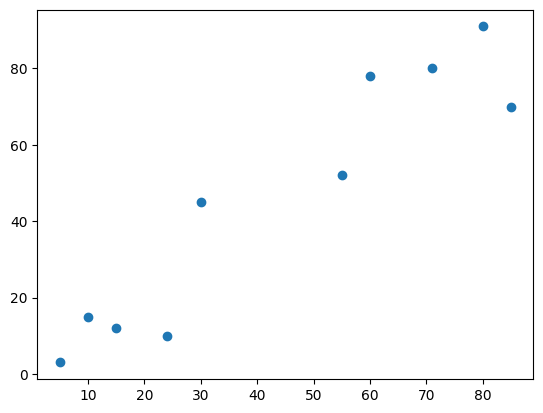

In [212]:
# visualize the data
plt.scatter(X[:,0], X[:,1], label='True positions')

In [213]:
# create clusters: if we assume 2 clusters
kmeans = KMeans(n_clusters=2)

In [214]:
# fit
kmeans.fit(X)

/home/shyam/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [217]:
# Explore the clusters: centroids & labels
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[70.2 74.2]
 [16.8 17. ]]
[1 1 1 1 1 0 0 0 0 0]


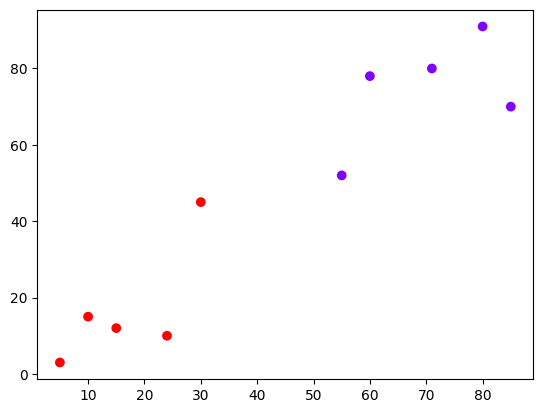

In [218]:
# Visualize k-means with two Clusters
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')

In [220]:
# what if we choose n_clusters=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[74.   79.75]
 [13.5  10.  ]
 [42.5  48.5 ]]
[1 1 1 1 2 0 0 0 2 0]


/home/shyam/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


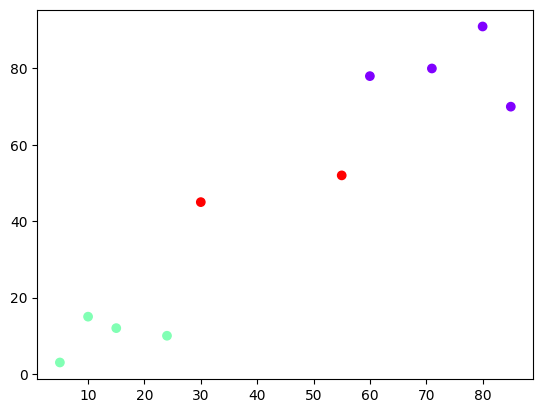

In [221]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')

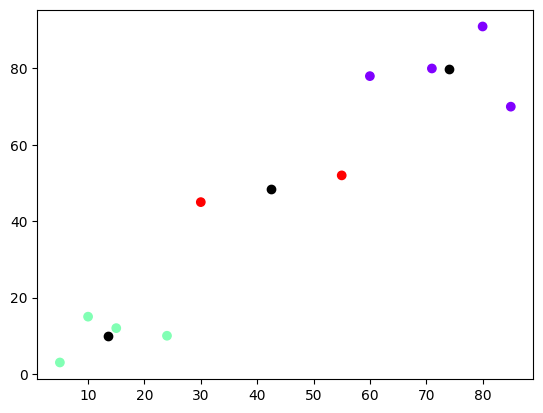

In [224]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')